# Rosenbrock using Neighbourhood Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.spatial import voronoi_plot_2d, Voronoi

from napy import NASearcher

The Rosenbrock function is a common optimisation test function given by 
$$f(x,y) = (a-x)^2 + b(y - x^2)^2$$
and has a global minimum at $(a, a^2)$

In [2]:
def rosenbrock(x, y, a=1, b=100):
    return (a - x) ** 2 + b * (y - x**2) ** 2

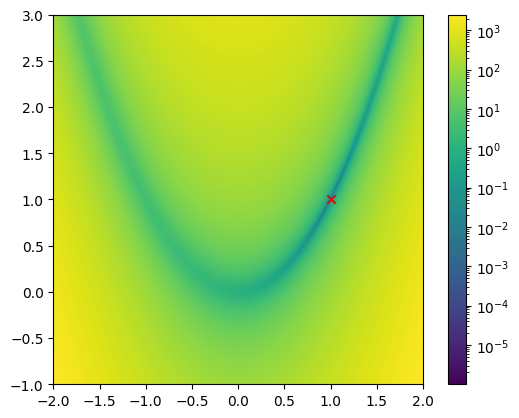

In [3]:
X, Y = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 3, 1000))
plt.imshow(rosenbrock(X, Y), origin="lower", extent=(-2, 2, -1, 3), norm=LogNorm())
plt.colorbar()
plt.scatter(1, 1, c="r", marker="x")

Neighbourhood Algorithm

In [4]:
def objective(params):
    return rosenbrock(*params)


searcher = NASearcher(
    objective,
    ns=70,
    nr=10,
    ni=100,
    n=20,
    bounds=((-2, 2), (-1, 3)),
)
searcher.run()

best = searcher.samples[np.argmin(searcher.objectives)]

array([0.9988761 , 0.99774851])

(-1.0, 3.0)

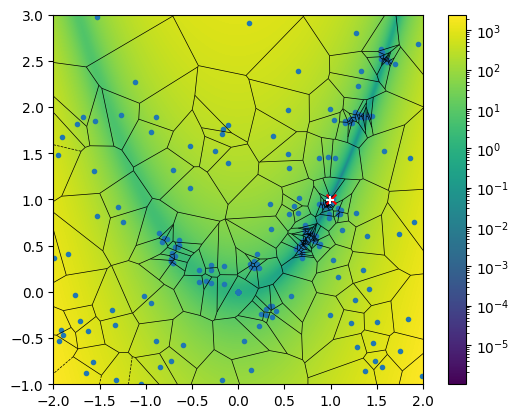

In [9]:

fig = voronoi_plot_2d(Voronoi(searcher.samples), show_vertices=False, line_width=0.5)
ax = fig.gca()
im = ax.imshow(rosenbrock(X, Y), origin="lower", extent=(-2, 2, -1, 3), norm=LogNorm())
fig.colorbar(im)
ax.scatter(1, 1, c="r", marker="x", s=50, zorder=10)
ax.scatter(*best, c="w", marker="+", zorder=10)
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)